In [1]:
import pandas as pd
import pickle
import dask.dataframe as dd

import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools

import subprocess

In [2]:
binom_reg = pd.read_csv('../binomial_regression_lastgen/binomial_reg_results_last_gen.csv')

In [3]:
blocks = pd.read_csv('../signficant_intersection/genes_info_bonferronicor_tair10.csv')

In [4]:
dict_blocks = '../key_files/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

In [5]:
binom_reg['block'] = binom_reg['snp_id'].map(reverse_mapping)

In [6]:
blocks['block_id'].unique()

array(['1_4899', '2_1265', '4_801', '5_2227', '4_2115', '5_571', '1_168'],
      dtype=object)

In [7]:
binom_reg_blocks = binom_reg[binom_reg['block'].isin(blocks['block_id'].unique())]

In [8]:
binom_reg_blocks.groupby('block')['slope'].mean() 
#4_2115
5_2227
5_571

5571

In [9]:
binom_reg_blocks.groupby('block')['slope'].min()

block
1_168    -0.495728
1_4899   -0.337224
2_1265    0.511498
4_2115   -0.034381
4_801    -0.333147
5_2227   -0.472535
5_571    -0.257883
Name: slope, dtype: float64

In [10]:
binom_reg_blocks[binom_reg_blocks['block'] == '5_2227']

,slope,pvalue,snp_id,block
977835,-0.203179,2.815687e-21,5_19276654,5_2227
977836,-0.065402,1.473345e-07,5_19276911,5_2227
977837,0.080603,8.578775e-05,5_19276914,5_2227
977838,-0.209045,7.791558e-28,5_19276932,5_2227
977839,-0.145128,3.584610e-30,5_19277210,5_2227
...,...,...,...,...
978924,0.068651,3.210491e-08,5_19386698,5_2227
978925,-0.019791,1.081077e-01,5_19386885,5_2227
978926,-0.016270,1.865673e-01,5_19387038,5_2227
978927,-0.016270,1.865673e-01,5_19387188,5_2227


In [11]:
blocks_to_plot = ['1_168', '1_4899', '4_801','4_2115', '5_571', '5_2227']

In [12]:
snps_dict = pd.read_csv('../key_files/var_pos_grenenet.csv')

In [13]:
snps_dict['block'] = snps_dict['id'].map(reverse_mapping)

In [ ]:
awk_conditions = []

for i in blocks_to_plot:
    start_idx = snps_dict[snps_dict['block'].isin([i])].index.values[0] + 2  # Adjusting the start index
    end_idx = snps_dict[snps_dict['block'].isin([i])].index.values[-1] + 2 # Adjusting the end index
    awk_conditions.append(f"NR >= {start_idx} && NR <= {end_idx}")  # Convert integers to strings inside f-string


# Join the conditions with ' || ' to match the awk syntax
awk_filter = ' || '.join(awk_conditions)

# Construct the final awk command
awk_command = f"awk '{awk_filter}' ../baypass_first_gen/merged_hapFIRE_allele_frequency_indexed.csv > af_blocks_to_plot_bonf_corr_all_sign.csv"

# Run the command using subprocess
subprocess.run(awk_command, shell=True, check=True)

In [ ]:
#awk 'NR >= 845212 && NR <= 845232 || NR >= 1868509 && NR <= 1868608 || NR >= 3053517 && NR <= 3053587' ../baypass_terminal/merged_hapFIRE_allele_frequency_indexed.csv > filtered_blocks.csv

In [ ]:
#awk 'NR >= 845212 && NR <= 845232 || NR >= 1868509 && NR <= 1868608 || NR >= 3053517 && NR <= 3053587' ../key_files/merged_hapFIRE_delta_p.txt > filtered_blocks_deltap.csv

In [23]:
## allele counts


#af = pd.read_csv('af_blocks_to_plot_bonf_corr_all_sign.csv',header=None)

af = pd.read_csv('cyp7_block.csv',header=None)
usecols = pd.read_csv('../baypass_first_gen/merged_hapFIRE_allele_frequency_indexed.csv',nrows =1).columns 
af.columns = usecols

In [24]:
af['block'] = af['0'].map(reverse_mapping)

In [25]:
p0_average_seed_mix = pd.read_csv('../key_files/p0_average_seed_mix.csv')
p0_average_seed_mix = pd.concat([p0_average_seed_mix,snps_dict ], axis=1)

In [26]:
blocks_to_plot

['1_168', '1_4899', '4_801', '4_2115', '5_571', '5_2227']

In [27]:
blocki = blocks_to_plot[0]

In [28]:
blocki = '2_1265'

In [29]:
## filter the allles 
aff = af[af['block'].isin([blocki])].drop('block', axis=1).copy()
## filter the snpsid 
snps_dict_filt = snps_dict[snps_dict['block'].isin([blocki])]
snps_dict_filt = snps_dict_filt.reset_index(drop=True)

causal = pd.concat([aff, snps_dict_filt],axis=1)


causal = causal[causal['maf05filter'].notna()]

causal_det = causal[['pos', 'chrom', 'maf05filter', 'total_alleles05filter_firstgen', 'block']].copy()

causal =causal.drop(['pos', 'chrom', 'maf05filter', 'total_alleles05filter_firstgen', 'total_alleles05filter_lastgen', 'block','Unnamed: 745', '0'],axis=1).set_index('id')

causal = causal.T.reset_index()

causal['site'] = causal['index'].str.split('_').str[0].astype(int)
causal['gen'] = causal['index'].str.split('_').str[1].astype(int)
causal['plot'] = causal['index'].str.split('_').str[2].astype(int)

In [22]:
causal

id,index,2_11533904,2_11533937,2_11533991,2_11533994,2_11534015,2_11534022,2_11534023,2_11534048,2_11534063,2_11534094,2_11534099,2_11534102,2_11534143,2_11534165,2_11534244,2_11534263,site,gen,plot
0,1_1_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
1,1_1_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2
2,1_1_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,3
3,1_1_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,4
4,1_1_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,60_1_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,1,8
741,60_1_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,1,9
742,60_1_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,1,10
743,60_1_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,1,11


In [25]:
for blocki in ['4_2115']:
    print(blocki)
    ## filter the allles 
    aff = af[af['block'].isin([blocki])].drop('block', axis=1).copy()
    ## filter the snpsid 
    snps_dict_filt = snps_dict[snps_dict['block'].isin([blocki])]
    snps_dict_filt = snps_dict_filt.reset_index(drop=True)

    causal = pd.concat([aff, snps_dict_filt],axis=1)


    causal = causal[causal['maf05filter'].notna()]
    
    causal_det = causal[['pos', 'chrom', 'maf05filter', 'total_alleles05filter_firstgen', 'block']].copy()
    
    causal =causal.drop(['pos', 'chrom', 'maf05filter', 'total_alleles05filter_firstgen', 'total_alleles05filter_lastgen', 'block','Unnamed: 745', '0'],axis=1).set_index('id')
    
    causal = causal.T.reset_index()

    causal['site'] = causal['index'].str.split('_').str[0].astype(int)
    causal['gen'] = causal['index'].str.split('_').str[1].astype(int)
    causal['plot'] = causal['index'].str.split('_').str[2].astype(int)
    
    clim_sites_during_exp = pd.read_csv('../key_files/bioclimvars_sites_era5_year_2018.csv')
    causal = causal.merge(clim_sites_during_exp[['site', 'bio1']]).drop('index',axis=1)#.drop(['index'],axis=1)
    
    # List to hold the data for plotting
    plot_data = {}
    
    # Assuming 'cold' is your DataFrame and 'p0_average_seed_mix' is defined
    for site, group in causal.groupby(['site']):
        for snp in group.columns[:-4]:
            to_plot = group[[snp, 'site', 'gen', 'plot']].copy()
            initial_freq = p0_average_seed_mix[p0_average_seed_mix['id'] == snp]['0'].values[0]
            row = to_plot.iloc[0, :].copy()
            row[snp] = initial_freq
            row['gen'] = 0
            to_plot = pd.concat([to_plot, row.to_frame().T], ignore_index=True)
            to_plot.columns = ['freq', 'site', 'gen', 'plot']
            # Append to the list
            plot_data[str(site[0]) + '-' + snp] = to_plot
    
    plot_data = pd.concat(plot_data,axis=0).reset_index().drop('level_1',axis=1)
    
    plot_data['snp'] = plot_data['level_0'].str.split('-').str[1]
    
    plot_data = plot_data.drop('level_0',axis=1)

    plot_data = plot_data.merge(clim_sites_during_exp[['site', 'bio1']])

    plot_data.to_csv(f'plot_data_{blocki}.csv',index=None)

4_2115


In [30]:
blocki

'2_1265'

In [14]:
plot_data = pd.read_csv(f'plot_data_{blocki}.csv')

NameError: name 'blocki' is not defined

In [ ]:
plot_data

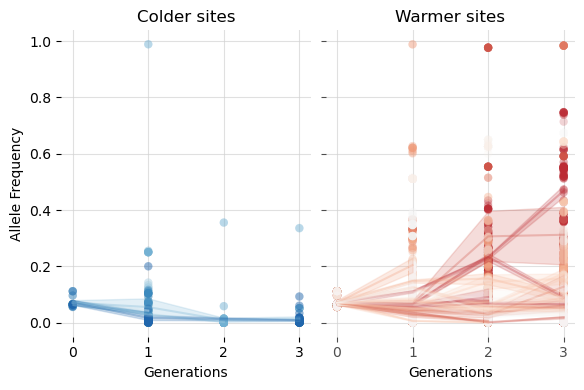

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Custom colors provided
custom_colors = [
    '#b2182b', '#b2182b', '#bc2b34', '#bc2b34', '#c53e3d', '#cf5246', '#cf5246', '#d86551', 
    '#e0775f', '#e0775f', '#e8896d', '#f09c7b', '#f09c7b', '#f5ac8b', '#f8bb9e', '#f8bb9e', 
    '#fac9b0', '#fac9b0', '#fcd7c2', '#fce1d1', '#fce1d1', '#fae8dd', '#f9f0ea', '#f9f0ea', 
    '#f7f7f7', '#f7f7f7', '#d9e9f1', '#abd2e5', '#72b1d3', '#3c8abe', '#2166ac'
]

# Set global parameters for the plots
plt.rcParams['axes.axisbelow'] = True
dark_grey = '#4D4D4D'  # Define dark grey color

# Assuming plot_data is your DataFrame with 'gen', 'freq', 'site', and 'bio1' columns

# Filter datasets based on 'bio1'
warm = plot_data[plot_data['bio1'] > 9.541]
cold = plot_data[plot_data['bio1'] <= 9.541]

# Calculate mean values for warm and cold datasets
mean_warm = warm.groupby(['gen', 'site'], as_index=False).mean()
mean_cold = cold.groupby(['gen', 'site'], as_index=False).mean()

# Sort and assign colors to each site
warm_sites = warm['site'].unique()
cold_sites = cold['site'].unique()
all_sites = np.concatenate([warm_sites, cold_sites])
site_colors = {site: color for site, color in zip(all_sites, custom_colors)}

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(7, 4), sharex=True, sharey=True)

def apply_styling(ax):
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(axis='both', colors=dark_grey)
    ax.grid(True, color='lightgrey', alpha=0.7)

# Plot data
for dataset, ax, title in zip([cold, warm], axes, ['Colder sites', 'Warmer sites']):
    sns.scatterplot(data=dataset, x='gen', y='freq', hue='site', palette=site_colors, ax=ax, alpha=0.2, legend=False, edgecolor='none')
    sns.lineplot(data=dataset, x='gen', y='freq', hue='site', ax=ax, palette=site_colors, alpha=0.3, legend=False)
    ax.set_title(title)
    ax.set_xlabel('Generations')
    ax.set_ylabel('Allele Frequency')
    ax.set_xticks([0, 1, 2, 3])  # Set specific x-ticks
    apply_styling(ax)


plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to fit the legend
plt.savefig('warm_vs_cold.pdf')

plt.show()


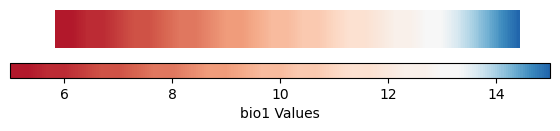

In [41]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Custom colors provided
custom_colors = [
    '#b2182b', '#b2182b', '#bc2b34', '#bc2b34', '#c53e3d', '#cf5246', '#cf5246', '#d86551', 
    '#e0775f', '#e0775f', '#e8896d', '#f09c7b', '#f09c7b', '#f5ac8b', '#f8bb9e', '#f8bb9e', 
    '#fac9b0', '#fac9b0', '#fcd7c2', '#fce1d1', '#fce1d1', '#fae8dd', '#f9f0ea', '#f9f0ea', 
    '#f7f7f7', '#f7f7f7', '#d9e9f1', '#abd2e5', '#72b1d3', '#3c8abe', '#2166ac'
]

# Assuming plot_data is your DataFrame with 'gen', 'freq', 'site', and 'bio1' columns
# Let's simulate some data to show how the gradient correlates with bio1 values
sites = range(len(custom_colors))
bio1_values = np.linspace(5, 15, len(sites))  # Create a range of bio1 values for demonstration
plot_data = pd.DataFrame({'site': sites, 'bio1': bio1_values})
warm = plot_data[plot_data['bio1'] > 9.541]  # Divide into warm and cold based on your cutoff
cold = plot_data[plot_data['bio1'] <= 9.541]

# Create a continuous colormap from your custom colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", custom_colors, N=256)

# Create a color bar
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# Define a gradient for the color bar
gradient = np.linspace(0, 1, 256).reshape(1, -1)
ax.imshow(gradient, aspect="auto", cmap=custom_cmap)
ax.set_axis_off()

# Add labels to the color bar
cbar_ax = fig.add_axes([0.05, 0.2, 0.9, 0.15])  # Adjust position as needed
norm = mcolors.Normalize(vmin=plot_data['bio1'].min(), vmax=plot_data['bio1'].max())
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('bio1 Values')

plt.savefig('only_barcolor.pdf')
plt.show()


In [ ]:
warm_colors

In [59]:
cold_colors

[(0.06251441753171857, 0.35750865051903113, 0.6429065743944637),
 (0.21568627450980393, 0.5294117647058824, 0.7542483660130719),
 (0.42274509803921567, 0.684075355632449, 0.8398923490965013),
 (0.6718954248366014, 0.8143790849673203, 0.9006535947712418),
 (0.8406920415224913, 0.9016378316032295, 0.9586620530565167)]

In [60]:
gradient

array([[0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
        0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
        0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
        0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
        0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
        0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
        0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
        0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
        0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
        0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
        0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
        0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
        0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
        0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
        0.2745098 , 0.27843137, 0.28235294, 0.28

In [31]:
from scipy.stats import linregress

In [32]:
fontsize= 12 

In [33]:
# Function to add p-value to plot
def add_regression_p_value(data, ax):
    # Perform linear regression using linregress
    slope, intercept, r_value, p_value, std_err = linregress(data['gen'], data['freq'])
    print(slope, intercept, r_value ** 2, p_value, std_err)
    # Display p-value and R-squared on the plot
    ax.text(0.05, 0.95, f'Slope = {slope:.3f}\nP-value = {p_value:.3g}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top', color=dark_grey)

In [35]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 

In [54]:
cold_color_map

{24.0: (0.06251441753171857, 0.35750865051903113, 0.6429065743944637),
 27.0: (0.21568627450980393, 0.5294117647058824, 0.7542483660130719),
 37.0: (0.42274509803921567, 0.684075355632449, 0.8398923490965013),
 23.0: (0.6718954248366014, 0.8143790849673203, 0.9006535947712418),
 48.0: (0.8406920415224913, 0.9016378316032295, 0.9586620530565167)}

-0.016647484118009426 0.05491209503045476 0.05587108717640776 1.6035819218554181e-18 0.0018680755616835405
0.009954493216320052 0.06854967939350838 0.005577516782193132 3.5894537125251375e-15 0.0012633112659520716


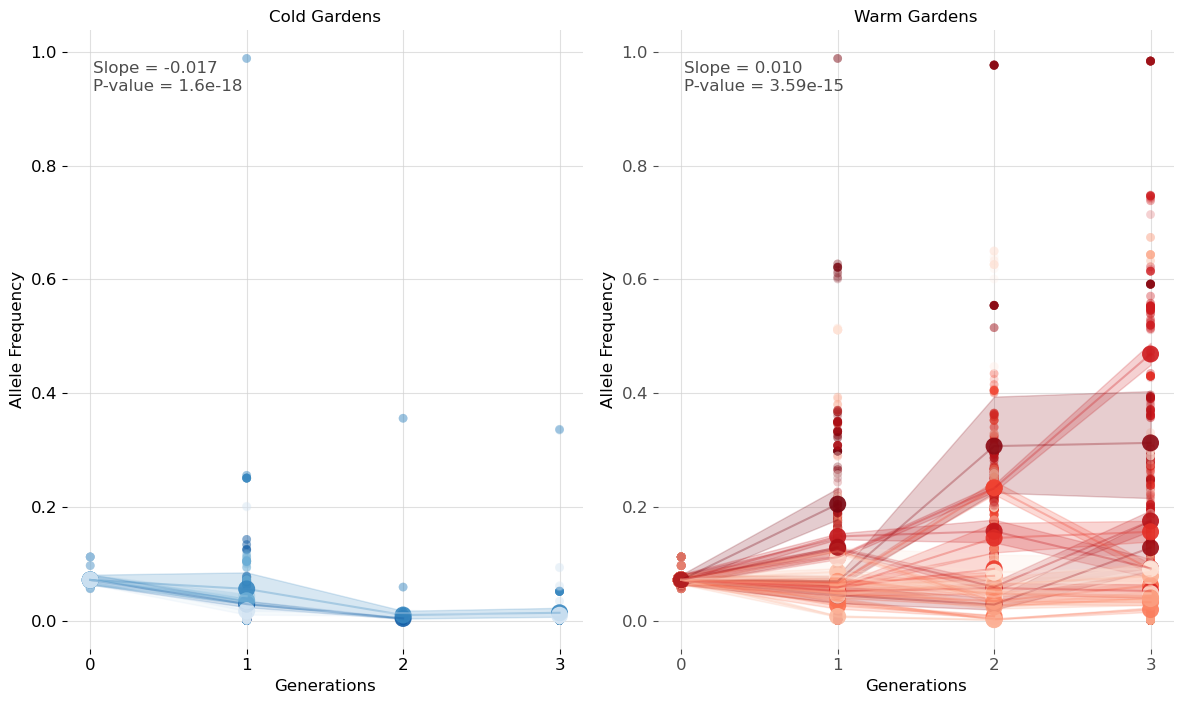

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set global parameters for the plots
plt.rcParams['axes.axisbelow'] = True
plt.rc('font', family='sans-serif', size=fontsize, weight='normal')  # Regular font size
plt.rc('axes', titlesize=fontsize, labelsize=fontsize)  # Title and label size for axes
plt.rc('xtick', labelsize=fontsize)  # X tick labels size
plt.rc('ytick', labelsize=fontsize)  # Y tick labels size

dark_grey = '#4D4D4D'  # Define dark grey color

# Assuming plot_data is your DataFrame with 'gen', 'freq', 'site', and 'bio1' columns

# Filter datasets based on 'bio1'
warm = plot_data[plot_data['bio1'] > 9.541]
cold = plot_data[plot_data['bio1'] <= 9.541]

# Calculate mean values for warm and cold datasets
mean_warm = warm.groupby(['gen', 'site'], as_index=False).mean()
mean_cold = cold.groupby(['gen', 'site'], as_index=False).mean()

# Create color palettes: red for warm sites, blue for cold sites
warm_sites = warm['site'].unique()
cold_sites = cold['site'].unique()

# Sort warm sites by bio1 values and assign shades of red
warm_color_map = {}
if len(warm_sites) > 0:
    warm_sites_with_bio1 = warm.groupby('site')['bio1'].mean().loc[warm_sites]
    sorted_warm_sites = warm_sites_with_bio1.sort_values().index
    warm_colors = sns.color_palette("Reds", len(sorted_warm_sites))  # Create a reds color palette
    warm_color_map = dict(zip(sorted_warm_sites, warm_colors))

# Sort cold sites by bio1 values and assign shades of blue
cold_color_map = {}
if len(cold_sites) > 0:
    cold_sites_with_bio1 = cold.groupby('site')['bio1'].mean().loc[cold_sites]
    sorted_cold_sites = cold_sites_with_bio1.sort_values().index
    cold_colors = sns.color_palette("Blues_r", len(sorted_cold_sites))  # Create a blues color palette
    cold_color_map = dict(zip(sorted_cold_sites, cold_colors))

# Create subplots: one for warm and one for cold conditions
fig, axes = plt.subplots(ncols=2, figsize=(12, 8), sharex=True)

# Function to apply styling
def apply_styling(ax):
    # Apply to spines
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set tick parameters
    plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors
    ax.grid(True, color='lightgrey', alpha=0.7)  # Enable grid

# Plot all scatter points for cold conditions in the first subplot
sns.scatterplot(data=cold, x='gen', y='freq', hue='site', palette=cold_color_map, ax=axes[0], alpha=0.2, s=40, legend=False, edgecolor='none')
sns.lineplot(data=cold, x='gen', y='freq', hue='site', ax=axes[0], palette=cold_color_map, alpha=0.3,legend=False)
# Plot mean values for cold conditions
for site in mean_cold['site'].unique():
    site_data = mean_cold[mean_cold['site'] == site]
    sns.scatterplot(data=site_data, x='gen', y='freq', ax=axes[0], s=150, color=cold_color_map[site], alpha=0.9,legend=False, edgecolor='none')

add_regression_p_value(cold, axes[0])

# Customize the first subplot for cold conditions
axes[0].set_title('Cold Gardens')
axes[0].set_ylabel('Allele Frequency')  # Change to Allele Frequency
axes[0].set_xlabel('Generations')  # Add x-label
axes[0].set_xticks([0, 1, 2, 3])  # Set specific x-ticks
apply_styling(axes[0])  # Apply styling to cold subplot

# Customize the second subplot for warm conditions
axes[1].set_title('Warm Gardens')
axes[1].set_xlabel('Generations')  # Add x-label
axes[1].set_ylabel('Allele Frequency')  # Change to Allele Frequency
axes[1].set_xticks([0, 1, 2, 3])  # Set specific x-ticks
apply_styling(axes[1])  # Apply styling to warm subplot

# Set grid only for specified ticks
for ax in axes:
    ax.set_xticks([0, 1, 2, 3])  # Ensure x-ticks are set
    ax.grid(True, color='lightgrey', alpha=0.7, which='both', axis='x')  # Enable grid on x-axis


# Plot all scatter points for warm conditions in the second subplot
sns.scatterplot(data=warm, x='gen', y='freq', hue='site', palette=warm_color_map, ax=axes[1], alpha=0.2, s=40, legend=False, edgecolor='none')
sns.lineplot(data=warm, x='gen', y='freq', hue='site', ax=axes[1], palette=warm_color_map, alpha=0.3,legend=False)
# Plot mean values for warm conditions
for site in mean_warm['site'].unique():
    site_data = mean_warm[mean_warm['site'] == site]
    sns.scatterplot(data=site_data, x='gen', y='freq', ax=axes[1], s=150, color=warm_color_map[site], alpha=0.9,legend=False, edgecolor='none')

add_regression_p_value(warm, axes[1])

    
# Create a DataFrame to hold site names and their corresponding average bio1 values
bio1_data = []

# Collect data for cold sites
for site in mean_cold['site'].unique():
    avg_bio1 = mean_cold[mean_cold["site"] == site]["bio1"].mean()
    bio1_data.append((site, avg_bio1, cold_color_map[site]))

# Collect data for warm sites
for site in mean_warm['site'].unique():
    avg_bio1 = mean_warm[mean_warm["site"] == site]["bio1"].mean()
    bio1_data.append((site, avg_bio1, warm_color_map[site]))

# Create a DataFrame from the collected data
bio1_df = pd.DataFrame(bio1_data, columns=['Site', 'Avg_Bio1', 'Color'])

# Sort the DataFrame by Avg_Bio1
bio1_df.sort_values(by='Avg_Bio1', inplace=True)

# Prepare legend handles and labels
handles = []
labels = []

# Collect handles and labels based on the sorted DataFrame
for _, row in bio1_df.iterrows():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=row['Color'], markersize=10))
    labels.append(f'Site {int(row["Site"])} bio1: {row["Avg_Bio1"]:.2f}')

# Optionally adjust layout


# Adjust layout to fit the legend properly
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to fit the legend
plt.savefig('colder_Vs_warmer_block_2_1264_nolegend.pdf', bbox_inches='tight')  # Use bbox_inches to ensure legend is included
#plt.savefig('colder_Vs_warmer_block_2_1264_nolegend.png', bbox_inches='tight', dpi=900)  # Use bbox_inches to ensure legend is included

plt.show()  # Display the plots after all data is plotted
#print(slope, intercept, r_value, p_value, std_err)

In [41]:
for i in cold['snp'].unique():
    initial_freq = p0_average_seed_mix[p0_average_seed_mix['id'] == i]['0']
    print(initial_freq.values[0])
    data = cold[cold['snp'] == i]
    slope, intercept, r_value, p_value, std_err = linregress(data['gen'], data['freq'])
    print(slope, intercept, r_value, p_value, std_err)

0.065530375
-0.014179048014096488 0.042073866859672536 -0.3787455799731248 0.000381490910312481 0.003826215142384783
0.058988
-0.013297585723042201 0.0398650907710507 -0.36196535161244137 0.0007163258836763999 0.00378184768375742
0.065530375
-0.014179048014096488 0.042073866859672536 -0.3787455799731248 0.000381490910312481 0.003826215142384783
0.065530375
-0.014179048014096488 0.042073866859672536 -0.3787455799731248 0.000381490910312481 0.003826215142384783
0.065530375
-0.014179048014096488 0.042073866859672536 -0.3787455799731248 0.000381490910312481 0.003826215142384783
0.065530375
-0.014179048014096488 0.042073866859672536 -0.3787455799731248 0.000381490910312481 0.003826215142384783
0.065530375
-0.014179048014096488 0.042073866859672536 -0.3787455799731248 0.000381490910312481 0.003826215142384783
0.065530375
-0.014179048014096488 0.042073866859672536 -0.3787455799731248 0.000381490910312481 0.003826215142384783
0.112014875
-0.02905900487073636 0.11425359241432466 -0.215810286779

In [42]:
p0_average_seed_mix = pd.read_csv('../key_files/p0_average_seed_mix.csv')
snps_dict = pd.read_csv('../key_files/var_pos_grenenet.csv')
p0_average_seed_mix = pd.concat([p0_average_seed_mix,snps_dict ], axis=1)

In [43]:
from scipy.stats import linregress

# Store results in a list to display as a DataFrame later
results = []

for i in cold['snp'].unique():
    # Get initial allele frequency
    initial_freq = p0_average_seed_mix[p0_average_seed_mix['id'] == i]['0'].values[0]
    
    # Extract data for the specific SNP
    data = cold[cold['snp'] == i]
    
    # Perform linear regression on generation vs allele frequency
    slope, intercept, r_value, p_value, std_err = linregress(data['gen'], data['freq'])
    
    # Calculate selection coefficient s
    if initial_freq * (1 - initial_freq) != 0:  # Avoid division by zero
        selection_coefficient = slope / (initial_freq * (1 - initial_freq))
    else:
        selection_coefficient = None  # Handle edge cases where freq = 0 or 1
    
    # Append results to the list
    results.append({
        'snp': i,
        'initial_freq': initial_freq,
        'slope': slope,
        'selection_coefficient': selection_coefficient,
        'r_value': r_value,
        'p_value': p_value,
        'std_err': std_err
    })

# Convert to DataFrame for better readability
s_cold = pd.DataFrame(results)

In [44]:
from scipy.stats import linregress

# Store results in a list to display as a DataFrame later
results = []

for i in warm['snp'].unique():
    # Get initial allele frequency
    initial_freq = p0_average_seed_mix[p0_average_seed_mix['id'] == i]['0'].values[0]
    
    # Extract data for the specific SNP
    data = warm[warm['snp'] == i]
    
    # Perform linear regression on generation vs allele frequency
    slope, intercept, r_value, p_value, std_err = linregress(data['gen'], data['freq'])
    
    # Calculate selection coefficient s
    if initial_freq * (1 - initial_freq) != 0:  # Avoid division by zero
        selection_coefficient = slope / (initial_freq * (1 - initial_freq))
    else:
        selection_coefficient = None  # Handle edge cases where freq = 0 or 1
    
    # Append results to the list
    results.append({
        'snp': i,
        'initial_freq': initial_freq,
        'slope': slope,
        'selection_coefficient': selection_coefficient,
        'r_value': r_value,
        'p_value': p_value,
        'std_err': std_err
    })

# Convert to DataFrame for better readability
import pandas as pd
s_warm = pd.DataFrame(results)

In [45]:
import numpy as np

In [46]:
# Calculate mean and interquartile range (IQR) for selection coefficients in cold and warm environments
mean_s_cold = s_cold['selection_coefficient'].mean()
iqr_s_cold = np.percentile(s_cold['selection_coefficient'], 75) - np.percentile(s_cold['selection_coefficient'], 25)

mean_s_warm = s_warm['selection_coefficient'].mean()
iqr_s_warm = np.percentile(s_warm['selection_coefficient'], 75) - np.percentile(s_warm['selection_coefficient'], 25)

# Display results
print(len(s_cold))
print(len(s_warm))
mean_s_cold, iqr_s_cold, mean_s_warm, iqr_s_warm


16
16


(-0.24685265723090719,
 0.013416491957661536,
 0.16899987378404485,
 0.004980665128041517)

In [47]:
s_cold['selection_coefficient']

0    -0.231547
1    -0.239560
2    -0.231547
3    -0.231547
4    -0.231547
5    -0.231547
6    -0.231547
7    -0.231547
8    -0.292146
9    -0.236248
10   -0.236248
11   -0.244289
12   -0.292146
13   -0.230596
14   -0.310594
15   -0.246986
Name: selection_coefficient, dtype: float64

In [52]:
# Create the legend outside the subplots
fig.legend(handles, labels, title='Site', loc='upper left', bbox_to_anchor=(1, 0.8), ncol=2)
plt.show()

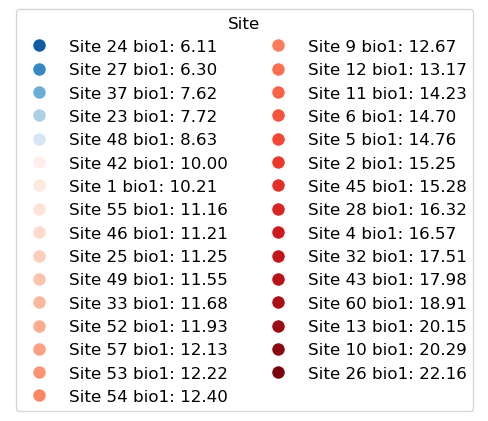

In [53]:


# Assuming `handles` and `labels` are created earlier

# Create a new figure for the legend
fig_legend = plt.figure(figsize=(6, 2))  # You can adjust the size as needed

# Add the legend to the new figure
fig_legend.legend(handles, labels, title='Site', loc='center', ncol=2)

# Remove axes (optional, but makes the legend-only plot cleaner)
plt.axis('off')

# Save the legend as a separate file
fig_legend.savefig('legend_only_hot_vs_coldenv.png', bbox_inches='tight')
fig_legend.savefig('legend_only_hot_vs_coldenv.pdf', bbox_inches='tight')

# Show the legend plot (optional)
plt.show()

In [81]:

# Perform linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(cold['gen'], cold['freq'])


In [82]:
slope

-0.016647484118009426

In [83]:
intercept

0.05491209503045476

In [84]:
r_value

-0.23637065633535767

In [85]:
p_value

1.6035819218554181e-18

In [316]:
# Create the legend outside the subplots
# Create a new legend handles and labels list
handles = []
labels = []

# Collect handles and labels based on the sorted DataFrame
for _, row in bio1_df.iterrows():
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=row['Color'], markersize=10))
    labels.append(f'Site {int(row["Site"])} bio1: {row["Avg_Bio1"]:.2f}')

# Create the legend in a separate Axes outside the subplots
legend_ax = fig.add_axes([1, 0.1, 0.2, 0.8])  # Add a new Axes for the legend
legend_ax.axis('off')  # Turn off the axes

# Create the legend in the new axes
legend_ax.legend(handles, labels, title='Site', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

# Adjust layout to fit the legend properly
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust layout to fit the legend
plt.savefig('colder_Vs_warmer_block_2_1264.svg', bbox_inches='tight')  # Use bbox_inches to ensure legend is included
plt.savefig('colder_Vs_warmer_block_2_1264.png', bbox_inches='tight')  # Use bbox_inches to ensure legend is included

plt.show()  # Display the plots after all data is plotted


['23.0 (Mean, Bio1: 7.72)',
 '24.0 (Mean, Bio1: 6.11)',
 '27.0 (Mean, Bio1: 6.30)',
 '37.0 (Mean, Bio1: 7.62)',
 '48.0 (Mean, Bio1: 8.63)',
 '1.0 (Mean, Bio1: 10.21)',
 '2.0 (Mean, Bio1: 15.25)',
 '4.0 (Mean, Bio1: 16.57)',
 '5.0 (Mean, Bio1: 14.76)',
 '6.0 (Mean, Bio1: 14.70)',
 '9.0 (Mean, Bio1: 12.67)',
 '10.0 (Mean, Bio1: 20.29)',
 '11.0 (Mean, Bio1: 14.23)',
 '12.0 (Mean, Bio1: 13.17)',
 '13.0 (Mean, Bio1: 20.15)',
 '25.0 (Mean, Bio1: 11.25)',
 '26.0 (Mean, Bio1: 22.16)',
 '28.0 (Mean, Bio1: 16.32)',
 '32.0 (Mean, Bio1: 17.51)',
 '33.0 (Mean, Bio1: 11.68)',
 '42.0 (Mean, Bio1: 10.00)',
 '43.0 (Mean, Bio1: 17.98)',
 '45.0 (Mean, Bio1: 15.28)',
 '46.0 (Mean, Bio1: 11.21)',
 '49.0 (Mean, Bio1: 11.55)',
 '52.0 (Mean, Bio1: 11.93)',
 '53.0 (Mean, Bio1: 12.22)',
 '54.0 (Mean, Bio1: 12.40)',
 '55.0 (Mean, Bio1: 11.16)',
 '57.0 (Mean, Bio1: 12.13)',
 '60.0 (Mean, Bio1: 18.91)']

In [ ]:
plt.rcParams['axes.axisbelow'] = True
plt.rc('font', family='sans-serif', size=10, weight='normal')  # Regular font size
plt.rc('axes', titlesize=8, labelsize=7)  # Title and label size for axes
plt.rc('xtick', labelsize=7)  # X tick labels size
plt.rc('ytick', labelsize=7)  # Y tick labels size

dark_grey = '#4D4D4D'  # Define dark grey color

# Apply to spines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Set tick parameters
plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors
axes[i].grid(True, color='lightgrey', alpha=0.7)

In [ ]:
causal_loci_save = causal.index

In [ ]:
causal_values = causal_first_gen.reset_index().drop(columns='id').T

In [ ]:
samples = causal_first_gen.columns

#clim_sites_during_exp = pd.read_csv('/carnegie/nobackup/scratch/tbellagio/grene/data/bioclimvars_experimental_sites_era5.csv')
clim_sites_during_exp = pd.read_csv('../key_files/bioclimvars_sites_era5_year_2018.csv')

sites_af = pd.Series(samples).str.split('_').str[0].astype(int)

sites_af.name = 'site'

env = sites_af.reset_index().merge(clim_sites_during_exp).drop(['index'],axis=1)

bio1 = env['bio1']

In [ ]:
bio1.index = causal_values.index

In [ ]:
bio1

In [ ]:
blocks_ids = blocks_to_plot['block'].unique()

In [ ]:
len(blocks_ids)

In [ ]:
colors = sns.color_palette("viridis", n_colors = len(blocks_ids))

# Create a dictionary that maps each block to a specific color
block_color_dict = {block: color for block, color in zip(blocks_ids, itertools.cycle(colors))}

In [ ]:
causal_det = causal_det.reset_index(drop=True)

In [ ]:
causal_det

In [8]:
causal_det['block'].unique()

NameError: name 'causal_det' is not defined

In [9]:
neutral_unique_blocks = blocks_to_plot[blocks_to_plot['type'] =='neutral']['block'].unique()

In [92]:
neutral_unique_blocks

array(['3_1103', '1_1555', '1_5039', '1_2834', '3_1463', '3_1308',
       '3_1280', '2_2050', '1_4969', '1_4832'], dtype=object)

In [93]:
neutral_unique_blocks[0]

'3_1103'

In [94]:
import numpy as np


In [97]:
block_rows

Index([4158, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169,
       4170, 4171, 4172, 4173],
      dtype='int64')

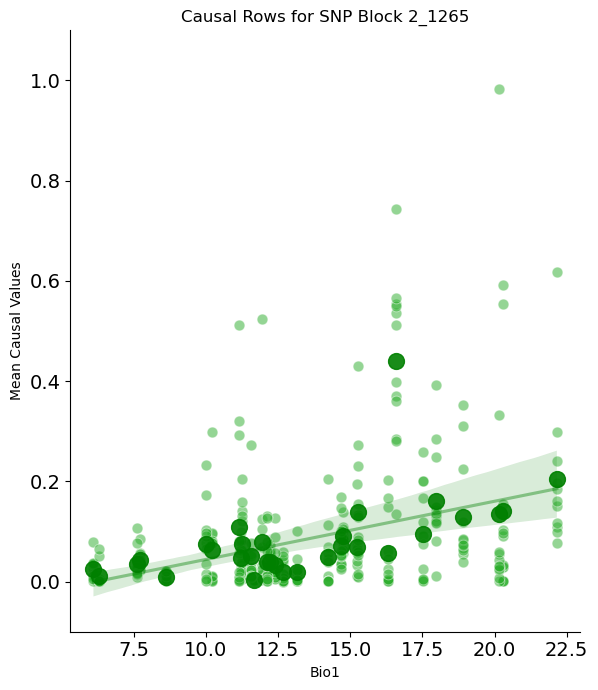

In [98]:
# Identify unique blocks from your data
unique_blocks = ['2_1265']

# Create subplots: one for each unique block
fig, axes = plt.subplots(nrows=len(unique_blocks), figsize=(6, 7 * len(unique_blocks)), sharex=True, sharey=True)

# If there's only one unique block, `axes` will not be an array, so we make it one
if len(unique_blocks) == 1:
    axes = [axes]

# Plot each row of causal as a line in the corresponding subplot
for i, block in enumerate(unique_blocks):
    # Filter the rows corresponding to the current block
    block_rows = causal_det[causal_det['block'] == block].index
    color = block_color_dict[block]
    
    # Initialize a list to hold causal values for calculating the mean
    all_causal_values = []

    for row in block_rows:
        # Collect the causal values for each row
        all_causal_values.append(causal_values[row])
    # Plot the mean as larger scatter points

    mean_causal_values = pd.DataFrame(all_causal_values).mean(axis=0)

    sns.scatterplot(x=bio1, y=mean_causal_values, color='#2aad2a', 
                   s= 60, alpha= 0.5 )
    # Create a DataFrame with bio1 and causal values
    causal_df = pd.DataFrame({'bio1': bio1, 'causal_values': pd.DataFrame(all_causal_values).mean(axis=0)})

    # Calculate the mean of causal values for each unique bio1 value
    mean_causal_df = causal_df.groupby('bio1').mean().reset_index()
    
    # Plot the mean causal values with regplot
    sns.regplot(x=mean_causal_df['bio1'], y=mean_causal_df['causal_values'], color='green',x_estimator=np.mean, 
                   scatter_kws={'s': 130, 'alpha': 0.9},  # Larger dots for mean values
                   line_kws={"alpha": 0.4}, ax=axes[i])  # Adjust transparency for regression line

    # Set labels and title for each subplot
    axes[i].set_title(f'Causal Rows for SNP Block {block}')
    axes[i].set_xlabel('Bio1')
    axes[i].set_ylabel('Mean Causal Values')
    axes[i].set_ylim(-0.1, 1.1)
    #axes[i].grid(True, color='lightgrey', alpha=0.7)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].tick_params(axis='both', which='major', labelsize=14)  # Adjust font size for both x and y axes

# Adjust the layout and show the plot
plt.tight_layout()
plt.savefig("adaptive_snps_af_2_1265_final_gen.svg", format='svg')  # Save as SVG

plt.show()


In [99]:
p0_average_seed_mix = pd.read_csv('../key_files/p0_average_seed_mix.csv')
snps_dict = pd.read_csv('../key_files/var_pos_grenenet.csv')
p0_average_seed_mix = pd.concat([p0_average_seed_mix,snps_dict ], axis=1)

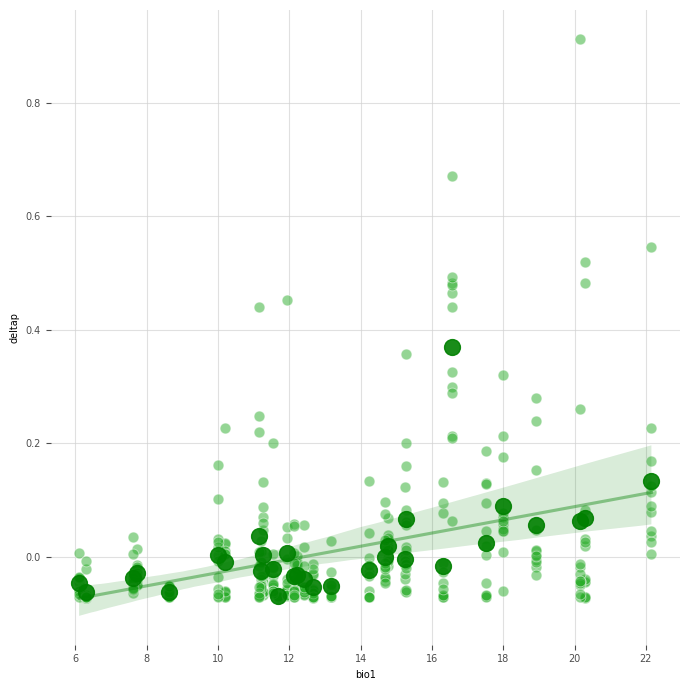

In [116]:
# Identify unique blocks from your data
unique_blocks = ['2_1265']

# Create subplots: one for each unique block, setting both width and height to the same value for a square shape
fig, axes = plt.subplots(nrows=len(unique_blocks), figsize=(7, 7 * len(unique_blocks)), sharex=True, sharey=True)

# If there's only one unique block, `axes` will not be an array, so we make it one
if len(unique_blocks) == 1:
    axes = [axes]



# Plot each row of causal as a line in the corresponding subplot
for i, block in enumerate(unique_blocks):
    # Filter the rows corresponding to the current block
    block_rows = causal_det[causal_det['block'] == block].index
    color = block_color_dict[block]
    
    # Initialize a list to hold causal values for calculating the mean
    all_causal_values = []

    for row in block_rows:
        # Collect the causal values for each row
        all_causal_values.append(causal_values[row] - initial_freq_2_1265)

    # Plot the mean as larger scatter points
    mean_causal_values = pd.DataFrame(all_causal_values).mean(axis=0)
    sns.scatterplot(x=bio1, y=mean_causal_values, color='#2aad2a', 
                   s=60, alpha=0.5)
    
    # Create a DataFrame with bio1 and causal values
    causal_df = pd.DataFrame({'bio1': bio1, 'causal_values': pd.DataFrame(all_causal_values).mean(axis=0)})

    # Calculate the mean of causal values for each unique bio1 value
    mean_causal_df = causal_df.groupby('bio1').mean().reset_index()
    
    # Plot the mean causal values with regplot
    sns.regplot(x=mean_causal_df['bio1'], y=mean_causal_df['causal_values'], color='green',
                x_estimator=np.mean, 
                scatter_kws={'s': 130, 'alpha': 0.9},  # Larger dots for mean values
                line_kws={"alpha": 0.4}, ax=axes[i])  # Adjust transparency for regression line

    # Set aspect ratio to be equal for square plots
    #axes[i].set_aspect('equal', adjustable='datalim')

    plt.rc('font', family='sans-serif', size=10, weight='normal')  # Regular font size
    plt.rc('axes', titlesize=8, labelsize=7)  # Title and label size for axes
    plt.rc('xtick', labelsize=7)  # X tick labels size
    plt.rc('ytick', labelsize=7)  # Y tick labels size
    
    dark_grey = '#4D4D4D'  # Define dark grey color
    
    # Apply to spines
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.ylabel('deltap')
    
    # Set tick parameters
    plt.tick_params(axis='both', colors=dark_grey)  # Set tick colors
    axes[i].grid(True, color='lightgrey', alpha=0.7)

# Adjust the layout and show the plot
plt.tight_layout()
plt.savefig("adaptive_snps_af_2_1265_final_gen.png")  # Save as PNG
plt.savefig("adaptive_snps_af_2_1265_final_gen.svg", format='svg')  # Save as SVG

plt.show()


In [ ]:
'#666666', '#BBBBBB'

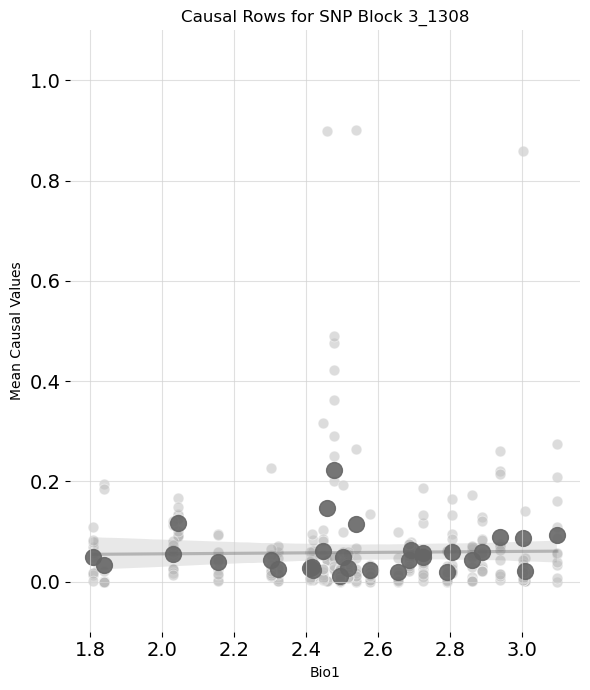

In [129]:
# Identify unique blocks from your data
unique_blocks = ['3_1308']

# Create subplots: one for each unique block
fig, axes = plt.subplots(nrows=len(unique_blocks), figsize=(6, 7 * len(unique_blocks)), sharex=True, sharey=True)

# If there's only one unique block, `axes` will not be an array, so we make it one
if len(unique_blocks) == 1:
    axes = [axes]

# Plot each row of causal as a line in the corresponding subplot
for i, block in enumerate(unique_blocks):
    # Filter the rows corresponding to the current block
    block_rows = causal_det[causal_det['block'] == block].index
    color = block_color_dict[block]
    
    # Initialize a list to hold causal values for calculating the mean
    all_causal_values = []

    for row in block_rows:
        # Collect the causal values for each row
        all_causal_values.append(causal_values[row])
    # Plot the mean as larger scatter points

    mean_causal_values = pd.DataFrame(all_causal_values).mean(axis=0)

    sns.scatterplot(x=bio1, y=mean_causal_values, color='#BBBBBB', 
                   s= 60, alpha= 0.5 )
    # Create a DataFrame with bio1 and causal values
    causal_df = pd.DataFrame({'bio1': bio1, 'causal_values': pd.DataFrame(all_causal_values).mean(axis=0)})

    # Calculate the mean of causal values for each unique bio1 value
    mean_causal_df = causal_df.groupby('bio1').mean().reset_index()
    
    
    # Plot the mean causal values with regplot
    sns.regplot(x=mean_causal_df['bio1'], y=mean_causal_df['causal_values'], color='#666666',x_estimator=np.mean, 
                   scatter_kws={'s': 130, 'alpha': 0.9},  # Larger dots for mean values
                   line_kws={"alpha": 0.4}, ax=axes[i])  # Adjust transparency for regression line
    
    axes[i].set_title(f'Causal Rows for SNP Block {block}')
    axes[i].set_xlabel('Bio1')
    axes[i].set_ylabel('Mean Causal Values')
    axes[i].set_ylim(-0.1, 1.1)
    axes[i].grid(True, color='lightgrey', alpha=0.7)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    
    # Set labels and title for each subplot
    axes[i].set_title(f'Causal Rows for SNP Block {block}')
    axes[i].set_xlabel('Bio1')
    axes[i].set_ylabel('Mean Causal Values')
    axes[i].set_ylim(-0.1, 1.1)
    axes[i].tick_params(axis='both', which='major', labelsize=14)  # Adjust font size for both x and y axes

# Adjust the layout and show the plot
plt.tight_layout()
plt.savefig("neutral_snps_af_3_1308_final_gen.svg", format='svg')  # Save as SVG

plt.show()